In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("input/charcters_stats.csv")

In [3]:
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [4]:
df.shape[0], df['Name'].nunique()

(611, 610)

In [5]:
df['Name'].value_counts()

Nova              2
Atom Girl         1
Lightning Lad     1
Ando Masahashi    1
Utgard-Loki       1
                 ..
Cannonball        1
Stacy X           1
Walrus            1
Trickster         1
Metamorpho        1
Name: Name, Length: 610, dtype: int64

### Duplicates in Name
Keep in mind.

In [6]:
df[df['Name']=="Nova"]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
417,Nova,good,100,85,67,101,100,85,538
418,Nova,good,38,60,100,100,100,25,423


# **Core Mission - 1**
### **Who's the strongest character?**

In [7]:
def get_sns_dist(df,column):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(df[column].dropna(), color='#2CA885', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(column)
    plt.show()

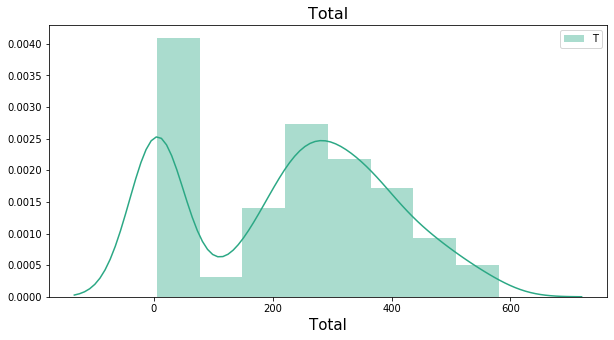

In [8]:
get_sns_dist(df,'Total')

In [9]:
df[df['Total'] == df['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


In [10]:
res = df.loc[df['Total'] == df['Total'].max(),'Name'].values[0]
print("The answer for Core Mission: {} of {}\n".format(res, df['Total'].max()))

The answer for Core Mission: Martian Manhunter of 581



<img src="images/Martian-Manhunter.jpg" width="50%" height="30%">

# **Core Mission - 2**
### **Compare Good and Bad**

In [11]:
cols = df.columns.tolist()[2:]
cols

['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat', 'Total']

In [12]:
good = df[df['Alignment']=='good'][:]
bad = df[df['Alignment']=='bad'][:]

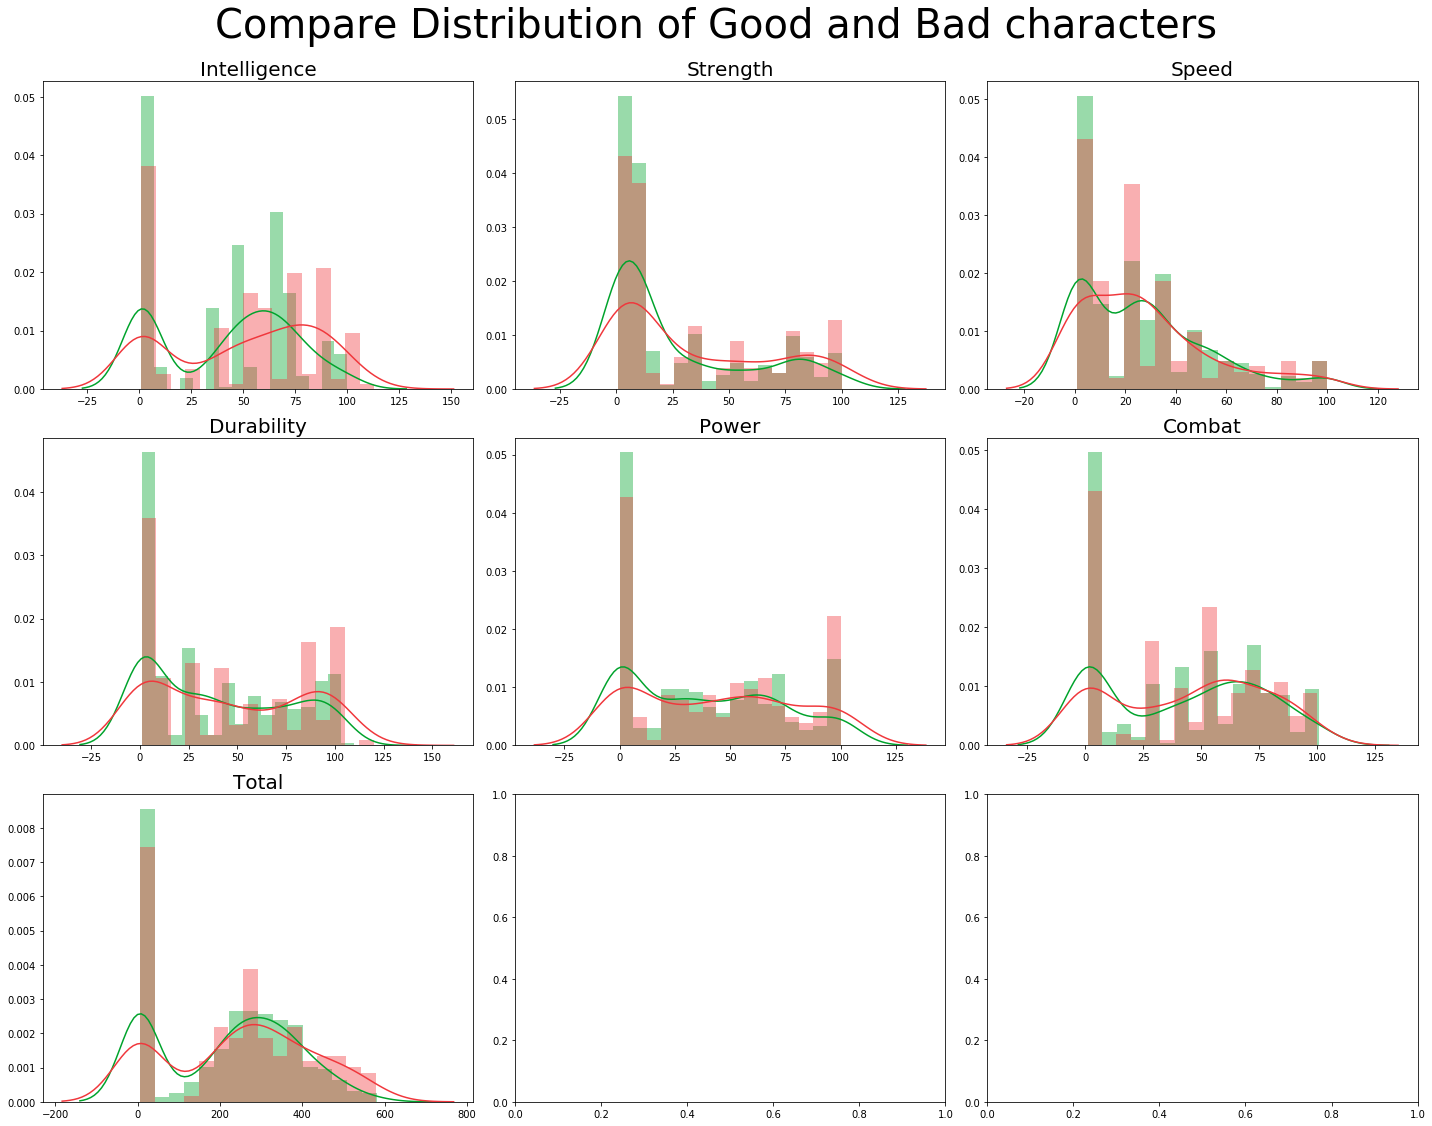

In [13]:
i = 0
fig, ax = plt.subplots(3,3,figsize=(20,15)) #(nrow, ncol)

for c in cols:
    i += 1
    plt.subplot(3,3,i)
    sns.distplot(good[c].dropna(), color='#00A32C', bins=16, hist_kws={"alpha": 0.4}).set_title(c, fontsize=16)
    sns.distplot(bad[c].dropna(), color='#F0373C', bins=16, hist_kws={"alpha": 0.4}).set_title(c, fontsize=16)
    plt.title(c, fontsize=20)
    plt.xlabel("") # hide xlabel with blank
    plt.tight_layout()

plt.suptitle('Compare Distribution of Good and Bad characters',fontsize=40,y=1.04)
plt.show();

Look at total dist plot.  
I can see that there are many low ability characters in this dataset.  
Let's see if I eliminate those characters, what can we see.  

In [14]:
df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


Just around 25% characters have just 5.  

In [15]:
tmp = df[df['Total']<6][:]
tmp.shape, df.shape, tmp.shape[0]/df.shape[0]

((177, 9), (611, 9), 0.2896890343698854)

almost 30%  

### Let's Plot again

In [16]:
tmp = df[df['Total']>5][:]
good1 = tmp[tmp['Alignment']=='good']
bad1 = tmp[tmp['Alignment']=='bad']

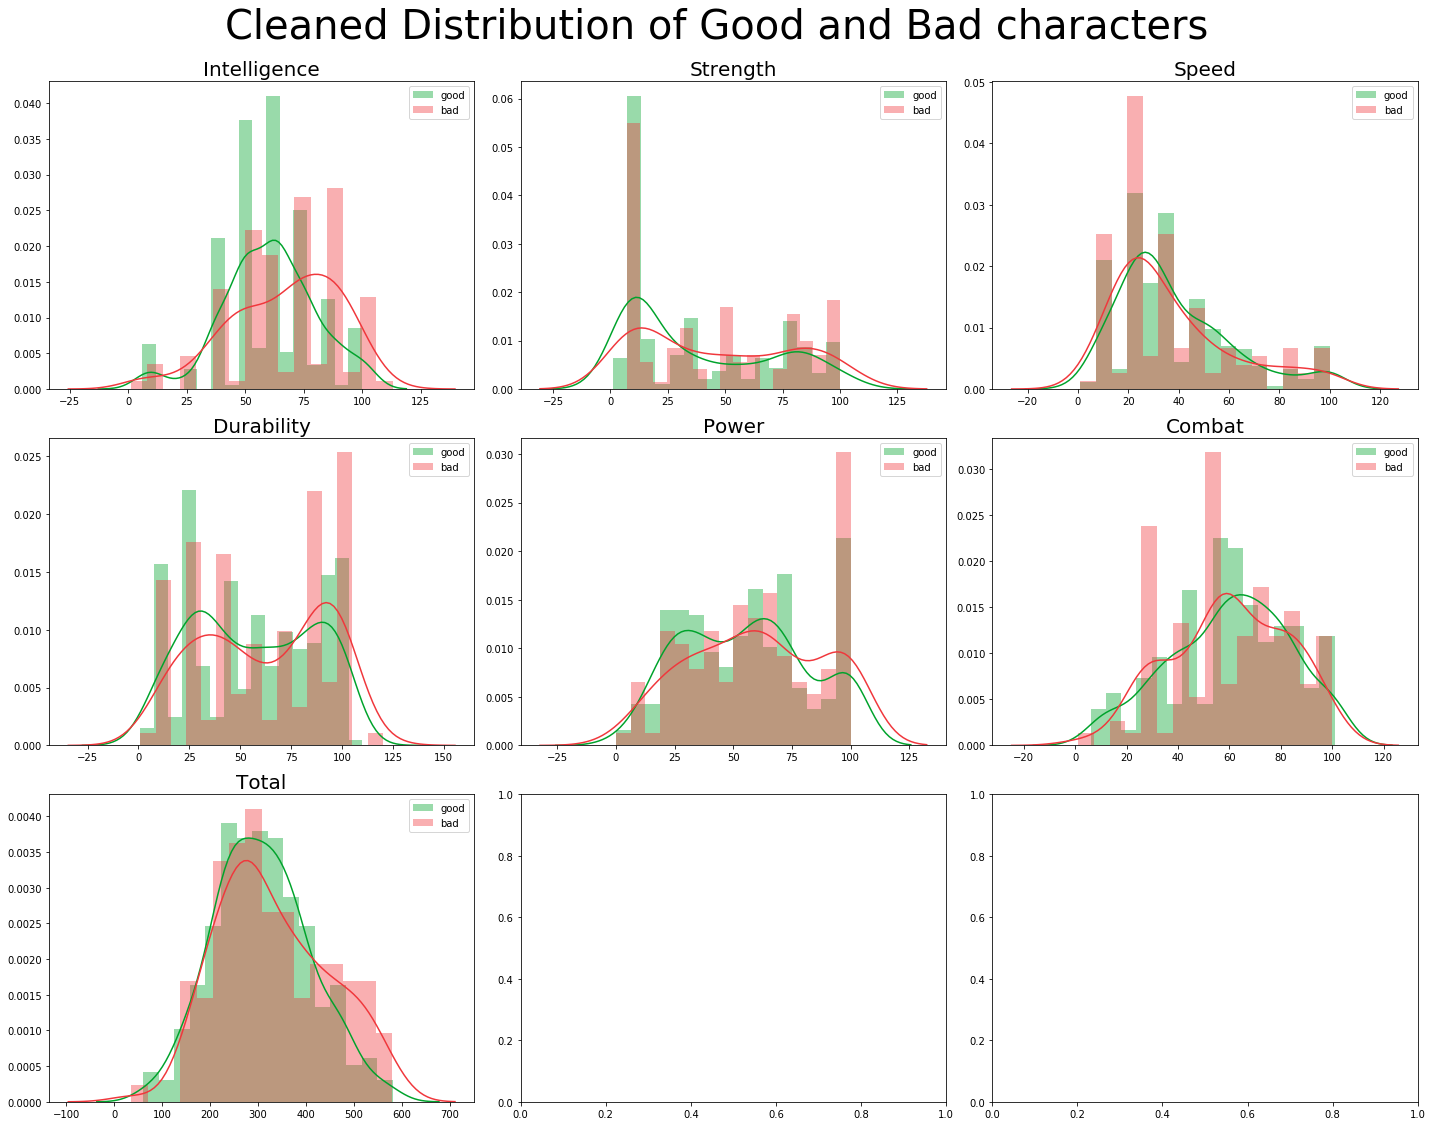

In [17]:
i = 0
fig, ax = plt.subplots(3,3,figsize=(20,15)) #(nrow, ncol)

for c in cols:
    i += 1
    plt.subplot(3,3,i)
    sns.distplot(good1[c].dropna(), color='#00A32C', bins=16, hist_kws={"alpha": 0.4},label='good').set_title(c, fontsize=16)
    sns.distplot(bad1[c].dropna(), color='#F0373C', bins=16, hist_kws={"alpha": 0.4},label='bad').set_title(c, fontsize=16)
    plt.title(c, fontsize=20)
    plt.legend()
    plt.xlabel("") # hide xlabel with blank
    plt.tight_layout()

plt.suptitle('Cleaned Distribution of Good and Bad characters',fontsize=40,y=1.04)
plt.show();

<img src="images/relaxed.jpg" width="40%" height="40%">

## One more
### make it logarithmic

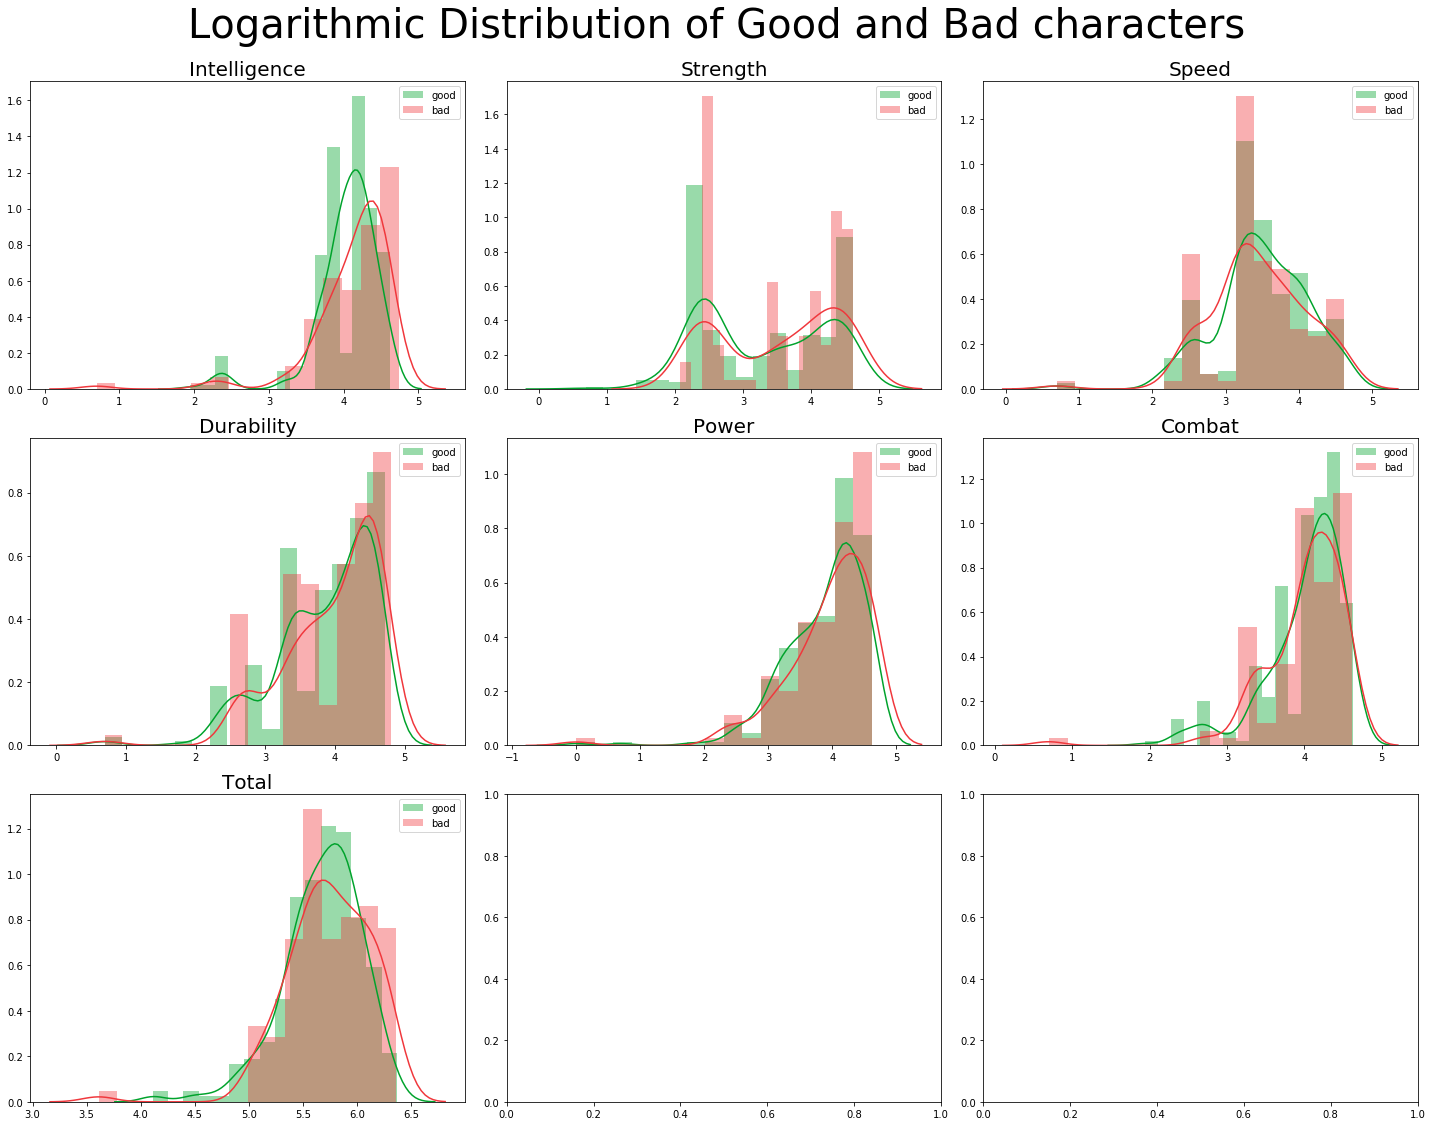

In [18]:
i = 0
fig, ax = plt.subplots(3,3,figsize=(20,15)) #(nrow, ncol)

for c in cols:
    i += 1
    plt.subplot(3,3,i)
    sns.distplot(np.log1p(good1[c].dropna()), color='#00A32C', bins=16, hist_kws={"alpha": 0.4},label='good').set_title(c, fontsize=16)
    sns.distplot(np.log1p(bad1[c].dropna()), color='#F0373C', bins=16, hist_kws={"alpha": 0.4},label='bad').set_title(c, fontsize=16)
    plt.title(c, fontsize=20)
    plt.legend()
    plt.xlabel("") # hide xlabel with blank
    plt.tight_layout()

plt.suptitle('Logarithmic Distribution of Good and Bad characters',fontsize=40,y=1.04)
plt.show();

# **Extra Mission - 1**

### **Which comics mean of total ability is the biggest?**
A: Marvel Comics        85104

In [19]:
comics = pd.read_csv("input/marvel_characters_info.csv")
comics['Name'].nunique(), df['Name'].nunique()

(715, 610)

In [20]:
comics.columns

Index(['ID', 'Name', 'Alignment', 'Gender', 'EyeColor', 'Race', 'HairColor',
       'Publisher', 'SkinColor', 'Height', 'Weight'],
      dtype='object')

In [21]:
tmp = df.merge(comics, on='Name', how='left')
tmp.shape, tmp.Name.nunique()

((629, 19), 610)

NaN in Publisher

In [22]:
# Sanity check
tmp.Publisher.value_counts(dropna=False)

Marvel Comics        349
DC Comics            172
NaN                   36
NBC - Heroes          19
Image Comics          13
Dark Horse Comics      8
HarperCollins          6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Icon Comics            4
Wildstorm              2
Shueisha               2
Hanna-Barbera          1
Microsoft              1
Sony Pictures          1
Universal Studios      1
Name: Publisher, dtype: int64

In [23]:
tmp.groupby(['Publisher'])['Total'].sum().sort_values(ascending=False)

Publisher
Marvel Comics        85104
DC Comics            43591
NBC - Heroes          2670
Dark Horse Comics     1575
Shueisha               963
SyFy                   944
Image Comics           918
ABC Studios            664
Icon Comics            592
Microsoft              425
Sony Pictures          398
Universal Studios      237
HarperCollins           30
Team Epic TV            25
Wildstorm               10
Hanna-Barbera            5
Name: Total, dtype: int64

### **Which alliance(?) will win in Neutral goes to weaker alliance between good and bad?**
good: 92876  
bad: 40790  
neutral: 3909  
good > bad + neutral  
Good win

In [24]:
df['Alignment'].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [25]:
good = df[df['Alignment']=='good'][:]
bad = df[df['Alignment']=='bad'][:]
neutral = df[df['Alignment']=='neutral'][:] 

In [26]:
df.groupby(['Alignment'])['Total'].sum().sort_values(ascending=False)

Alignment
good       92876
bad        40790
neutral     3909
Name: Total, dtype: int64

## **Distribution of all 3 Alignment groups**

In [27]:
good = df[df['Alignment']=='good'][:]
bad = df[df['Alignment']=='bad'][:]
neutral = df[df['Alignment']=='neutral'][:] 

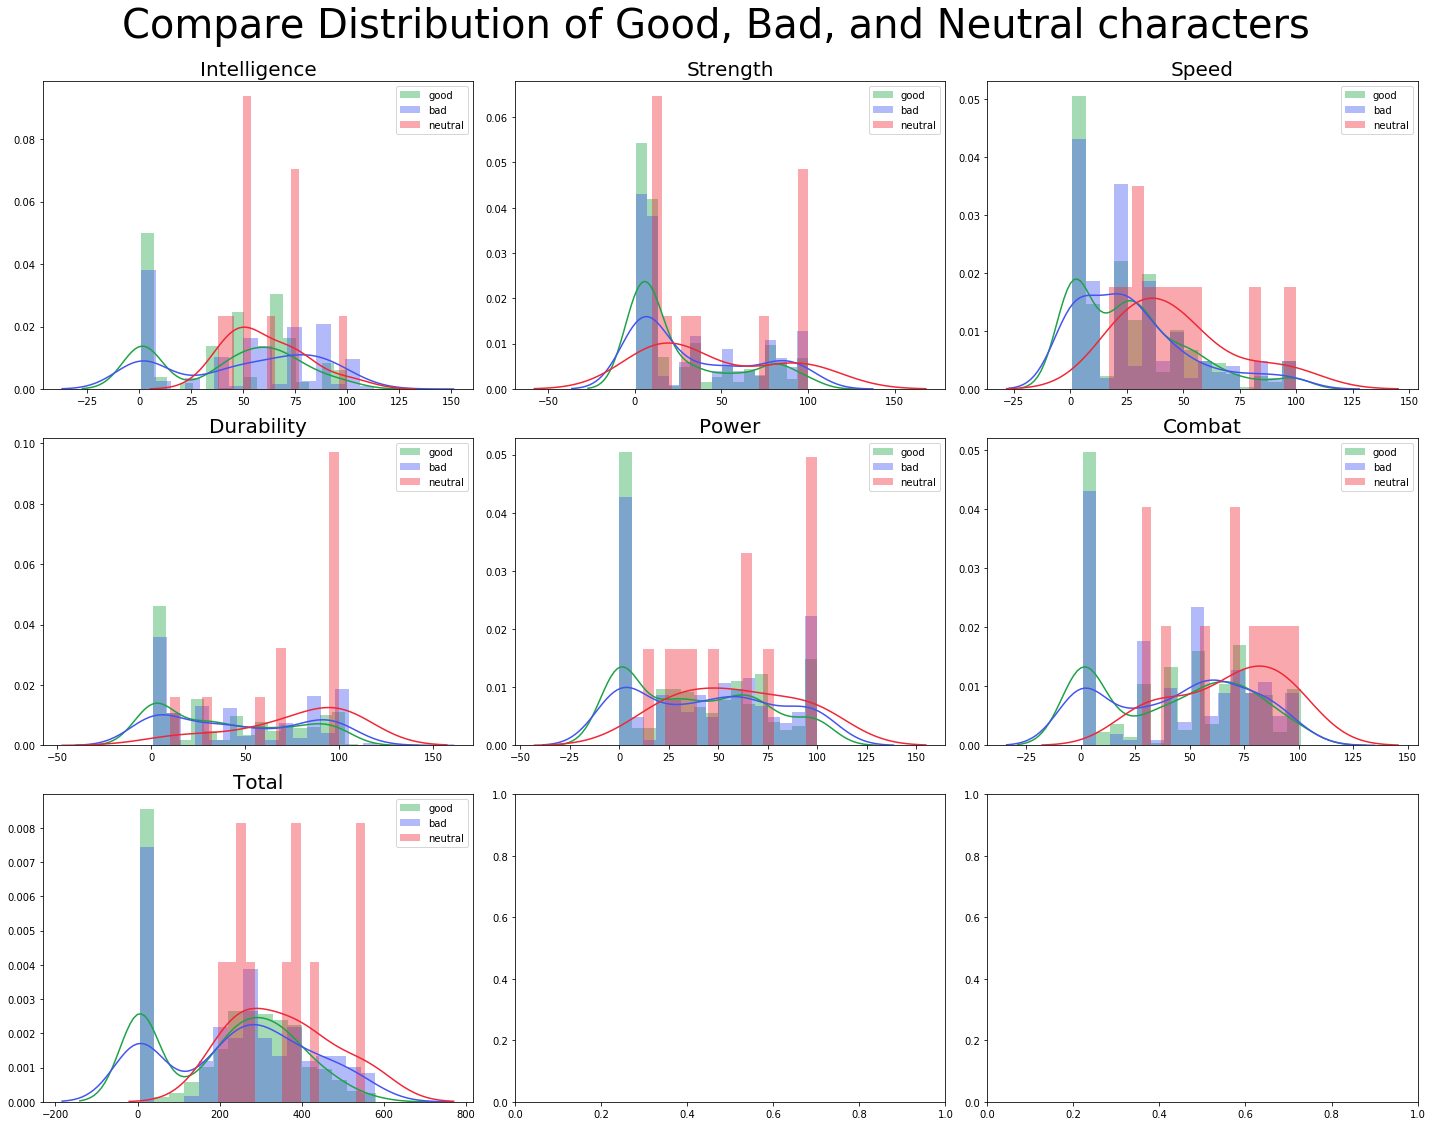

In [28]:
i = 0
fig, ax = plt.subplots(3,3,figsize=(20,15)) #(nrow, ncol)

for c in cols:
    i += 1
    plt.subplot(3,3,i)
    sns.distplot(good[c].dropna(), color='#1DA345', bins=16, hist_kws={"alpha": 0.4},label='good').set_title(c, fontsize=16)
    sns.distplot(bad[c].dropna(), color='#4354F0', bins=16, hist_kws={"alpha": 0.4},label='bad').set_title(c, fontsize=16)
    sns.distplot(neutral[c].dropna(), color='#F02735', bins=16, hist_kws={"alpha": 0.4},label='neutral').set_title(c, fontsize=16)
    plt.title(c, fontsize=20)
    plt.legend()
    plt.xlabel("") # hide xlabel with blank
    plt.tight_layout()

plt.suptitle('Compare Distribution of Good, Bad, and Neutral characters',fontsize=40,y=1.04)
plt.show();

Neutral has different distribution compared to the other two.

## Rare Cases of Publisher

In [29]:
tmp.Publisher.value_counts(dropna=False)

Marvel Comics        349
DC Comics            172
NaN                   36
NBC - Heroes          19
Image Comics          13
Dark Horse Comics      8
HarperCollins          6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Icon Comics            4
Wildstorm              2
Shueisha               2
Hanna-Barbera          1
Microsoft              1
Sony Pictures          1
Universal Studios      1
Name: Publisher, dtype: int64

In [30]:
rare_pub = tmp.Publisher.value_counts(dropna=False).tail(4).index.tolist()

In [31]:
tmp[tmp['Publisher'].isin(rare_pub)]

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
84,Birdman,good,1,1,1,1,0,1,5,90.0,good,Male,-,God / Eternal,-,Hanna-Barbera,-,-99.0,-99.0
186,Darkman,good,75,14,23,85,12,28,237,202.0,good,Male,-,-,-,Universal Studios,-,-99.0,-99.0
277,Hancock,good,50,85,65,100,70,28,398,307.0,good,Male,brown,Human,Black,Sony Pictures,-,188.0,-99.0
374,Master Chief,good,75,73,35,80,62,100,425,435.0,good,Male,brown,Human / Altered,Brown,Microsoft,-,213.0,-99.0


Birdman: 영화로 처음 알게 된 캐릭터  
<img src="images/birdman.jpg" width="40%" height="40%">  
Darkman: 어디서 본 것 같은데..  
<img src="images/darkman.jpeg" width="40%" height="40%">  
Hancock: 윌스미스 기차 씬이 제일 기억에 남는다.  
<img src="images/hancock.jpg" width="40%" height="40%">  
Master Chief: 헤일로 등장인물이라고 한다.  
<img src="images/masterchief.jpg" width="40%" height="40%">  